# Pre EDA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
pd.options.display.max_rows = 20

In [2]:
df = pd.read_csv('default_sample.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 72 columns):
age                                 6979 non-null float64
amount_repaid                       6979 non-null int64
amount_spent_next1month             6979 non-null int64
cash_rebate                         6979 non-null int64
cash_rebate_amount                  0 non-null float64
credit_rep                          6979 non-null int64
credit_rep_plus_moral_rel           6979 non-null int64
credit_rep_version                  2000 non-null float64
creditlimit                         6979 non-null float64
crowding_out_exp                    6979 non-null int64
ctrl                                6979 non-null int64
debt_to_income                      2979 non-null float64
debt_to_income_moral                2979 non-null float64
default                             6979 non-null int64
delinquent                          6979 non-null int64
female                              6979 non

# 1.  Which one of the following treatments that affects debt repayment rate the most :religious moral incentive, non-religious moral incentive, financial incentive, credit reputation?
Untuk no 1 kita memakai data dengan ekstensi dta yang mana value pada kolom treatmentnya lebih lengkap.

## Data Preparation

In [3]:
data = pd.read_stata('data_replication.dta')
data.head()

,age,amount_repaid,amount_spent_next1month,cash_rebate,cash_rebate_amount,credit_rep,credit_rep_plus_moral_rel,credit_rep_version,creditlimit,crowding_out_exp,ctrl,debt_to_income,debt_to_income_moral,default,delinquent,female,followup_exp,income,late_2016,main_exp,male,male_moral,min_payment,moral_all,moral_first,moral_imp,moral_non,moral_rel,moral_repeated,muslim,muslim_moral,old,old_moral,outstanding,p_usage_next1month,poor_credit_history,poor_credit_history_moral,province,province_name,randomcardnumber,religious_plac,repaid_twice_min,sample_before,savings_15,savings_18,savings_account,savings_reduced,simple_rem,simple_rem_plus_due_date_message,time_lag_first_moral,treatment,treatment_repeated,treatment_wave1,treatment_wave2,treatment_wave3,treatment_wave4,treatment_wave5,treatment_wave6,type_obs,wave
0,49.916668,0.0,0.0,0.0,NaN,0.0,0.0,NaN,10.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,60.000000,0.0,1.0,NaN,NaN,980100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,9.80100,0.0,0.0,NaN,27.0,Unknown,000004000075,0.0,0.0,0.0,NaN,NaN,0.0,NaN,1.0,0.0,NaN,simple_rem,,,,simple_rem,,,,Treated,3
1,35.333332,0.0,13313.0,0.0,NaN,0.0,0.0,NaN,10.0,0.0,0.0,1.0,1.0,NaN,1.0,0.0,0.0,60.000000,1.0,1.0,1.0,1.0,1455684.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,14.55684,1.0,1.0,1.0,28.0,West Java,000023000075,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,moral_non,,,,,moral_non,,moral_non,Treated,4
2,36.166668,250000.0,NaN,0.0,NaN,0.0,0.0,NaN,10.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,60.000000,1.0,0.0,NaN,NaN,1455684.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,14.55684,NaN,1.0,NaN,28.0,West Java,000023000075,0.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,10.0,moral_non,moral_repeated,,,,moral_non,,moral_non,Repeated,6
3,32.833336,0.0,NaN,0.0,NaN,0.0,0.0,NaN,10.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0,164.554001,1.0,1.0,0.0,0.0,925000.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.25000,NaN,0.0,0.0,28.0,West Java,000094100075,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,moral_rel,,,,,,moral_rel,,Treated,5
4,44.666668,0.0,0.0,0.0,NaN,0.0,0.0,NaN,10.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,108.348000,0.0,1.0,1.0,0.0,916200.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,9.16200,0.0,0.0,0.0,33.0,West Sumatra,000100030075,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,ctrl,,,,ctrl,,,,Control,3


In [4]:
data['treatment'].isnull().sum()

0

In [5]:
data['treatment'].value_counts()

                                    6994
ctrl                                4570
moral_rel                           2486
credit_rep                          2000
simple_rem                          1362
moral_non                           1292
moral_imp                           1280
credit_rep_plus_moral_rel           1000
simple_rem_plus_due_date_message    1000
religious_plac                      1000
cash_rebate                          336
rstr                                 200
Name: treatment, dtype: int64

In [6]:
treatments = data['treatment'].unique()

for t in treatments:
    sample = data[data['treatment'] == t]
    null_percg = len(sample[sample['amount_repaid'] == 0])/len(sample)
    print(t, null_percg)

simple_rem 0.6417033773861968
moral_non 0.6470588235294118
moral_rel 0.6222847948511665
ctrl 0.6684901531728665
credit_rep_plus_moral_rel 0.561
 0.7197597941092365
religious_plac 0.653
simple_rem_plus_due_date_message 0.583
moral_imp 0.640625
credit_rep 0.557
rstr 0.64
cash_rebate 0.6815476190476191


In [7]:
data['income'].describe()

count    23520.000000
mean       151.431183
std        872.738770
min          0.000000
25%         60.000000
50%         60.000000
75%        115.116747
max      60000.000000
Name: income, dtype: float64

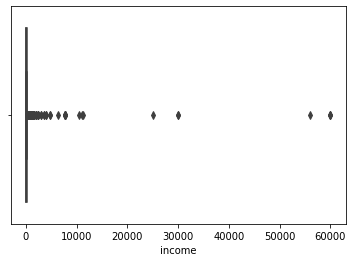

In [8]:
sns.boxplot(x=data['income'])

outlier dengan income lebih dari 20000 dihapus

In [9]:
drop=data[data['income']>20000]
data.drop(drop.index,inplace=True)

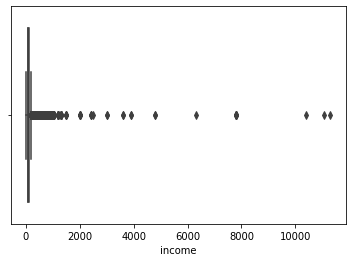

In [10]:
sns.boxplot(x=data['income'])

In [11]:
data['amount_repaid'].describe()

count    2.351300e+04
mean     6.154826e+05
std      1.925778e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.500000e+05
max      5.220000e+07
Name: amount_repaid, dtype: float64

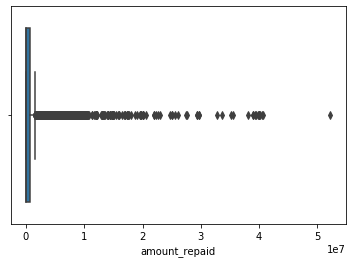

In [12]:
sns.boxplot(x=data['amount_repaid'])

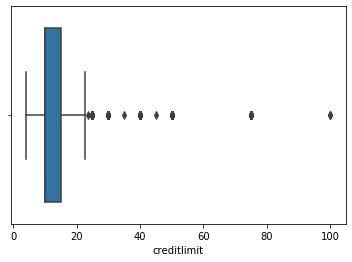

In [13]:
sns.boxplot(x=data['creditlimit'])

Karena amount_repaid sangat besar dibanding income dan creditlimit. Maka kita anggap amount_repaid memiliki satuan ribu berbeda dengan kedua kolom yang disebut sebelumnya yang bersatuan juta. Sehingga kita konversi terlebih dulu ke dalam satuan juta agar semua satuan yang dibandingkan sama. 

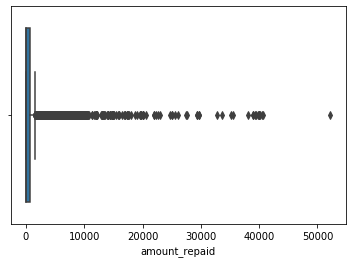

In [14]:
data['amount_repaid'] = data['amount_repaid'].apply(lambda x: x/1000)
sns.boxplot(x=data['amount_repaid'])

In [15]:
data['outstanding'].describe()

count    23513.000000
mean        10.016100
std          9.684579
min          0.050000
25%          3.964000
50%          7.958000
75%         12.070000
max        207.031998
Name: outstanding, dtype: float64

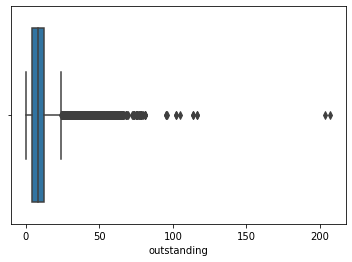

In [16]:
sns.boxplot(x=data['outstanding'])

In [17]:
data['amount_repaid_to_outs'] = data['amount_repaid']/ data['outstanding']

In [18]:
data['amount_repaid_to_inc'] = data['amount_repaid']/ data['income']

In [19]:
# Filter treatment yang dipakai saja
data_treatmt = data[(data['treatment'] == 'cash_rebate') | (data['treatment'] == 'moral_non') | (data['treatment'] == 'moral_rel') | (data['treatment'] == 'credit_rep')]

## 1.1 Amount Repaid to Outstanding
Cek bagaimana jumlah uang yang sudah dibayarkan terhadap sisa tagihan mereka sesuai treatment yang diberikan. Semakin besar rasio maka semakin bagus karena dapat dianggap treatment tersebut membuat orang membayar tagihannya semaksimal mungkin.

### Data Preprocessing & Cleansing


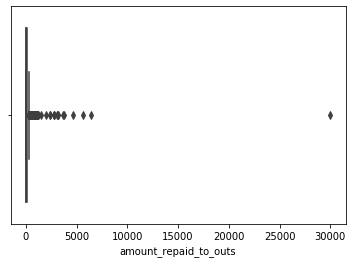

In [20]:
sns.boxplot(x = data_treatmt['amount_repaid_to_outs'])

Terdapat outlier pada kolom aount_repaid_to_outs yang memiliki value 3x lebih besar dari data lainnya. Selanjutnya data tersebut kami hapus.

In [21]:
drop = data_treatmt[data_treatmt['amount_repaid_to_outs'] == data_treatmt['amount_repaid_to_outs'].max()]
data_treatmt.drop(drop.index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
data_treatmt['amount_repaid_to_outs'].describe()

count    6112.000000
mean       96.239120
std       266.936425
min         0.000000
25%         0.000000
50%         0.000000
75%       102.204604
max      6417.793777
Name: amount_repaid_to_outs, dtype: float64

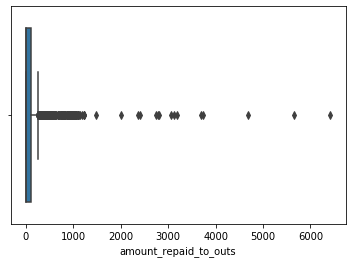

In [23]:
sns.boxplot(x = data_treatmt['amount_repaid_to_outs'])

### Analisis

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

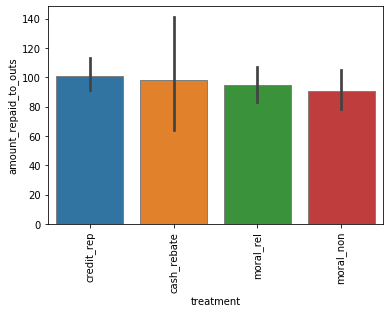

In [24]:
sns.barplot(x = data_treatmt['treatment'], y = data_treatmt['amount_repaid_to_outs']
            ,order=['credit_rep','cash_rebate','moral_rel','moral_non'],edgecolor='.5')
plt.xticks(rotation = 90)

 Treatment credit reputation dan cash rebate memiliki rata-rata amount repaid to outstanding tertinggi.

## 1.2 Amount Repaid to Income

### Data Preprocessing & Cleansing

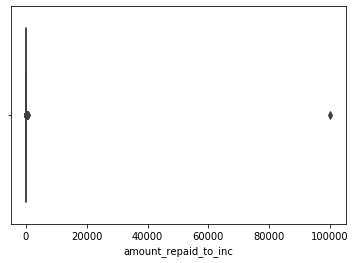

In [25]:
sns.boxplot(x = data_treatmt['amount_repaid_to_inc'])

Drop data amount_repaid_to_income tertinggi yang jauh lebih besar dari value lain

In [26]:
drop = data_treatmt[data_treatmt['amount_repaid_to_inc'] == data_treatmt['amount_repaid_to_inc'].max()]
data_treatmt.drop(drop.index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


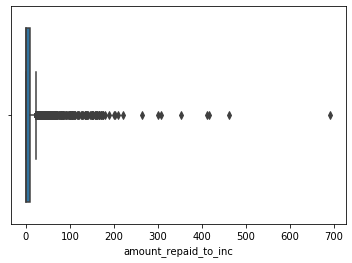

In [27]:
sns.boxplot(x = data_treatmt['amount_repaid_to_inc'])

Pada amount_repaid_to_inc terdapat banyak nilai 0

In [28]:
drop = data_treatmt[data_treatmt['income'] == 0 ]
data_treatmt.drop(drop.index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


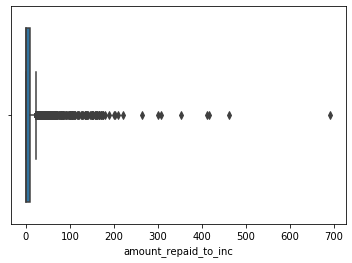

In [29]:
sns.boxplot(x = data_treatmt['amount_repaid_to_inc'])

In [30]:
data_treatmt['income'].value_counts()

60.000000      2752
500.000000      262
25.000000       174
36.000000       125
65.000000       102
1000.000000      94
120.000000       71
180.000000       62
600.000000       51
130.000000       39
               ... 
61.814999         1
116.349998        1
334.549988        1
39.528000         1
59.316002         1
165.552002        1
167.267395        1
47.463001         1
209.274002        1
66.495003         1
Name: income, Length: 1334, dtype: int64

In [31]:
q1 = data_treatmt['amount_repaid_to_inc'].quantile(0.25)
q3 = data_treatmt['amount_repaid_to_inc'].quantile(0.75)
iqr = q3-q1
batas_atas = 3*iqr + q3
batas_bawah = q1 - 3*iqr
outliers = data_treatmt[(data_treatmt['amount_repaid_to_inc'] > batas_atas) | (data_treatmt['amount_repaid_to_inc'] < batas_bawah)]
print(len(outliers)/len(data_treatmt)*100)

4.124386252045826


In [32]:
data_treatmt[data_treatmt['amount_repaid_to_inc'] > batas_atas]['amount_repaid_to_inc'] = 35154.6162109375

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


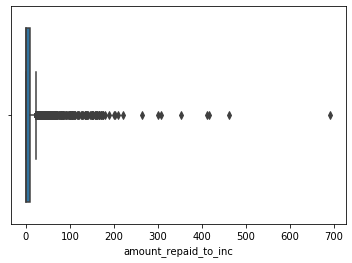

In [33]:
sns.boxplot(x = data_treatmt['amount_repaid_to_inc'])

In [34]:
data_treatmt['amount_repaid_to_inc'].describe()

count    6110.000000
mean        7.991230
std        23.864196
min         0.000000
25%         0.000000
50%         0.000000
75%         8.795192
max       692.000000
Name: amount_repaid_to_inc, dtype: float64

### Analisis

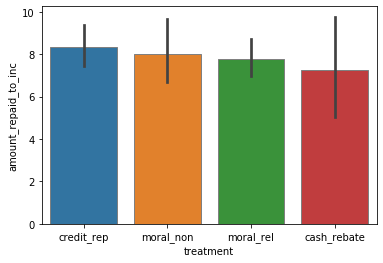

In [35]:
sns.barplot(x = data_treatmt['treatment'], y = data_treatmt['amount_repaid_to_inc']
            ,order=['credit_rep','moral_non','moral_rel','cash_rebate'],edgecolor='.5')

Pada grafik di atas dapat dilihat bahwa credit reputation dan moral non religious merupakan kategori treatment dengan amount_repaid_to_inc tertinggi. Dapat disimpulkan bahwa pelanggan yang mendapat treatment tersebut memiliki komitmen yang lebih tinggi untuk membayar kredit walaupun jumlah yang perlu dibayar cendereung tinggi.

## Kesimpulan
Dari kedua analisis diatas dapat dilihat dua treatment yang paling berpengaruh terhadap pembayaran tagihan sesuai definisi kita, yaitu:
- amount_repaid_to_outstanding : cash_rebate dan credit_rep
- amount_repaid_to_income      : moral_non dan credit_rep
Treatment yang konsisten selalu tertinggi dari kedua analisis yang kita lakukan adalah credit_rep. Sehingga dapat disimpulkan treatment yang paling berpengaruh terhadap pembayaran tagihan pelanggan adalah credit_rep.

# 2  How many customers are being delinquent repeatedly for more than twice?
Untuk menjawab pertanyaan ini kita akan menggunakan dua cara, yaitu dengan melihat randomcardnumber dan treatment_wave

## 2.1 Randomcardnumber
Kita menelusuri kolom randomcardnumber yang seharusnya menunjukkan keunikan kartu tiap orang. Jika terdapat lebih dari satu randomcardnumber maka kita akan selidiki apakah randomcardnumber tersebut menunjukkan delinquent lebih dari satu kali

### Data Preprocessing & Cleansing

In [36]:
df['randomcardnumber'].value_counts().sort_values(ascending=False)

560359000075    3
913323000075    3
256274000075    3
590530000075    3
323481000075    2
112890000082    2
89680100075     2
757921000075    2
663010000064    2
505103000075    2
               ..
143580000082    1
74684000075     1
675459000075    1
315872000075    1
577411000075    1
23996000075     1
758100109075    1
134511030082    1
122140000064    1
507100009064    1
Name: randomcardnumber, Length: 6797, dtype: int64

Mencari index dimana randomcardnumber berulang dan memasukkan index-index tersebut ke sebuah dataframe baru bernama dataset

In [37]:
target = df['randomcardnumber'].value_counts().sort_values(ascending=False)
values = target.keys().tolist()
counts = target.tolist()
len(counts)
dik={}
for i in range(6796):
    dik[values[i]] = counts[i]

redundant = {}
id = []
for d in dik:
    if dik[d] > 2:
        redundant[d] = dik[d]
        id.append(d)

In [38]:
dobel = []
dataset = pd.DataFrame(columns=df.columns)
for i in id:
    row = df[df['randomcardnumber']==i]
    dataset = pd.concat([dataset,row])
#dataset['randomcardnumber']
dataset[['randomcardnumber','delinquent']]

,randomcardnumber,delinquent
5401,560359000075,0
5456,560359000075,0
6008,560359000075,1
3327,913323000075,0
3872,913323000075,1
3873,913323000075,1
5466,256274000075,1
5979,256274000075,1
6294,256274000075,1
2562,590530000075,0


In [39]:
dataset['delinquent'] = dataset['delinquent'].astype(int)
dataset['delinquent']

5401    0
5456    0
6008    1
3327    0
3872    1
3873    1
5466    1
5979    1
6294    1
2562    0
2874    1
3213    0
Name: delinquent, dtype: int32

### Analisis

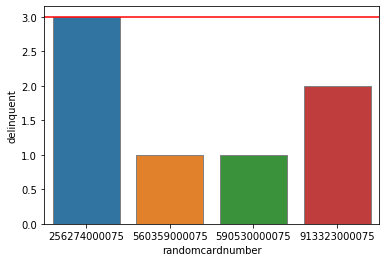

In [40]:
grup_randomCN = dataset.groupby('randomcardnumber').sum()
sns.barplot(x=grup_randomCN.index,y=grup_randomCN['delinquent'],edgecolor='.5')
plt.axhline(3,color='red')
plt.show()


Dari metode ini hanya satu kartu yang terdaftar sebagai delinquent lebih dari 2 kali

## 2.2 Treatment Wave
Cara selanjutnya akan diasumsikan kartu yang telat membayar tagihan akan diberi treatment yang dapat dilihat pada kolom treatment_wave1 - treatment_wave6. Jika dalam satu baris terdapat nilai pada treatment_wave lebih dari satu kali maka dianggap baris tersebut sering membayar telat berkali-kali.

### Data Preprocessing & Cleansing

In [41]:
# Buat dataframe baru dari dataframe asli
treatwave = ['treatment_wave1','treatment_wave2','treatment_wave3','treatment_wave4','treatment_wave5','treatment_wave6']
data_treat = df.copy()
data_treat.head()

,age,amount_repaid,amount_spent_next1month,cash_rebate,cash_rebate_amount,credit_rep,credit_rep_plus_moral_rel,credit_rep_version,creditlimit,crowding_out_exp,ctrl,debt_to_income,debt_to_income_moral,default,delinquent,female,followup_exp,income,late_2016,main_exp,male,male_moral,min_payment,moral_all,moral_first,moral_imp,moral_non,moral_rel,moral_repeated,muslim,muslim_moral,old,old_moral,outstanding,p_usage_next1month,poor_credit_history,poor_credit_history_moral,province,province_name,randomcardnumber,religious_plac,repaid_twice_min,sample_before,savings_15,savings_18,savings_account,savings_reduced,simple_rem,simple_rem_plus_due_date_message,time_lag_first_moral,treatment,treatment_repeated,treatment_wave1,treatment_wave2,treatment_wave3,treatment_wave4,treatment_wave5,treatment_wave6,type_obs,wave,default_sample,ctrl_extra_weight,weight,prediction,high_credit_risk,low_credit_risk,religious_province,religious_province_moral,high_credit_risk_50,high_credit_risk_75,high_credit_risk_90,high_credit_risk_95
0,40.250000,484000,0,0,NaN,1,0,2.0,10.0,0,0,NaN,NaN,0,0,1,0,60.0,0,1,NaN,NaN,484000,0,0,0,0,0,0,1,NaN,NaN,NaN,4.84000,0,1,NaN,1,Aceh,28164000075,0,0,0,NaN,NaN,0,NaN,0,0,NaN,credit_rep,NaN,credit_rep,NaN,NaN,NaN,NaN,NaN,Treated,1,1,NaN,1.0,0.054791,0,1,1,NaN,1,0,0,0
1,56.000000,0,0,0,NaN,0,0,NaN,10.0,0,1,1.0,0.0,1,1,0,0,60.0,0,1,1.0,0.0,575600,0,0,0,0,0,0,1,0.0,1.0,0.0,5.75600,0,1,0.0,1,Aceh,433074000075,0,0,0,NaN,NaN,0,NaN,0,0,NaN,ctrl,NaN,ctrl,NaN,NaN,NaN,NaN,NaN,Control,1,1,NaN,1.0,0.077450,0,1,1,0.0,1,1,0,0
2,26.333334,0,1745370,0,NaN,0,0,NaN,10.0,0,0,0.0,0.0,0,1,0,0,60.0,0,1,1.0,1.0,247400,1,1,0,0,1,0,1,1.0,0.0,0.0,2.47400,1,0,0.0,1,Aceh,184692000075,0,0,0,NaN,NaN,0,NaN,0,0,NaN,moral_rel,NaN,NaN,moral_rel,NaN,NaN,NaN,NaN,Treated,2,1,NaN,1.0,0.058166,0,1,1,1.0,1,0,0,0
3,32.333332,1410000,1040000,0,NaN,0,0,NaN,10.0,0,0,1.0,1.0,0,0,1,0,60.0,0,1,0.0,0.0,1407956,1,1,0,0,1,0,1,1.0,0.0,0.0,14.07956,1,1,1.0,1,Aceh,393092000075,0,0,0,NaN,NaN,0,NaN,0,0,NaN,moral_rel,NaN,NaN,moral_rel,NaN,NaN,NaN,NaN,Treated,2,1,NaN,1.0,0.061453,0,1,1,1.0,1,0,0,0
4,41.000000,600000,0,0,NaN,1,0,2.0,10.0,0,0,NaN,NaN,0,0,0,0,60.0,0,1,NaN,NaN,257600,0,0,0,0,0,0,1,NaN,NaN,NaN,2.57600,0,0,NaN,1,Aceh,250955000075,0,1,0,NaN,NaN,0,NaN,0,0,NaN,credit_rep,NaN,NaN,credit_rep,NaN,NaN,NaN,NaN,Treated,2,1,NaN,1.0,0.056379,0,1,1,NaN,1,0,0,0


In [42]:
#Mengisi nilai nan dengan 0
data_treat.fillna(0,inplace=True)
data_treat.head()

,age,amount_repaid,amount_spent_next1month,cash_rebate,cash_rebate_amount,credit_rep,credit_rep_plus_moral_rel,credit_rep_version,creditlimit,crowding_out_exp,ctrl,debt_to_income,debt_to_income_moral,default,delinquent,female,followup_exp,income,late_2016,main_exp,male,male_moral,min_payment,moral_all,moral_first,moral_imp,moral_non,moral_rel,moral_repeated,muslim,muslim_moral,old,old_moral,outstanding,p_usage_next1month,poor_credit_history,poor_credit_history_moral,province,province_name,randomcardnumber,religious_plac,repaid_twice_min,sample_before,savings_15,savings_18,savings_account,savings_reduced,simple_rem,simple_rem_plus_due_date_message,time_lag_first_moral,treatment,treatment_repeated,treatment_wave1,treatment_wave2,treatment_wave3,treatment_wave4,treatment_wave5,treatment_wave6,type_obs,wave,default_sample,ctrl_extra_weight,weight,prediction,high_credit_risk,low_credit_risk,religious_province,religious_province_moral,high_credit_risk_50,high_credit_risk_75,high_credit_risk_90,high_credit_risk_95
0,40.250000,484000,0,0,0.0,1,0,2.0,10.0,0,0,0.0,0.0,0,0,1,0,60.0,0,1,0.0,0.0,484000,0,0,0,0,0,0,1,0.0,0.0,0.0,4.84000,0,1,0.0,1,Aceh,28164000075,0,0,0,0.0,0.0,0,0.0,0,0,0.0,credit_rep,0.0,credit_rep,0,0,0,0,0,Treated,1,1,0.0,1.0,0.054791,0,1,1,0.0,1,0,0,0
1,56.000000,0,0,0,0.0,0,0,0.0,10.0,0,1,1.0,0.0,1,1,0,0,60.0,0,1,1.0,0.0,575600,0,0,0,0,0,0,1,0.0,1.0,0.0,5.75600,0,1,0.0,1,Aceh,433074000075,0,0,0,0.0,0.0,0,0.0,0,0,0.0,ctrl,0.0,ctrl,0,0,0,0,0,Control,1,1,0.0,1.0,0.077450,0,1,1,0.0,1,1,0,0
2,26.333334,0,1745370,0,0.0,0,0,0.0,10.0,0,0,0.0,0.0,0,1,0,0,60.0,0,1,1.0,1.0,247400,1,1,0,0,1,0,1,1.0,0.0,0.0,2.47400,1,0,0.0,1,Aceh,184692000075,0,0,0,0.0,0.0,0,0.0,0,0,0.0,moral_rel,0.0,0,moral_rel,0,0,0,0,Treated,2,1,0.0,1.0,0.058166,0,1,1,1.0,1,0,0,0
3,32.333332,1410000,1040000,0,0.0,0,0,0.0,10.0,0,0,1.0,1.0,0,0,1,0,60.0,0,1,0.0,0.0,1407956,1,1,0,0,1,0,1,1.0,0.0,0.0,14.07956,1,1,1.0,1,Aceh,393092000075,0,0,0,0.0,0.0,0,0.0,0,0,0.0,moral_rel,0.0,0,moral_rel,0,0,0,0,Treated,2,1,0.0,1.0,0.061453,0,1,1,1.0,1,0,0,0
4,41.000000,600000,0,0,0.0,1,0,2.0,10.0,0,0,0.0,0.0,0,0,0,0,60.0,0,1,0.0,0.0,257600,0,0,0,0,0,0,1,0.0,0.0,0.0,2.57600,0,0,0.0,1,Aceh,250955000075,0,1,0,0.0,0.0,0,0.0,0,0,0.0,credit_rep,0.0,0,credit_rep,0,0,0,0,Treated,2,1,0.0,1.0,0.056379,0,1,1,0.0,1,0,0,0


In [43]:
#Mengganti perlakuan apapun dengan nilai 1
for t in treatwave:
    data_treat[t] = data_treat[t].apply(lambda x:0 if x==0 else 1)
data_treat[treatwave]

,treatment_wave1,treatment_wave2,treatment_wave3,treatment_wave4,treatment_wave5,treatment_wave6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,1,0,0,0,0,0
6,0,1,1,0,0,0
7,0,1,0,0,0,0
8,0,1,0,0,0,0
9,1,0,0,0,0,0


In [44]:
def jml():
    jml = 0
    for t in treatwave:
        jml+=data_treat[t]
        
    return jml

data_treat['treatment_total'] = jml()
data_treat['Lebih dari tiga'] = data_treat['treatment_total'].apply(lambda x: 'Lebih dari dua' if x>2 else 'Kurang dari atau sama dengan dua')

### Analisis

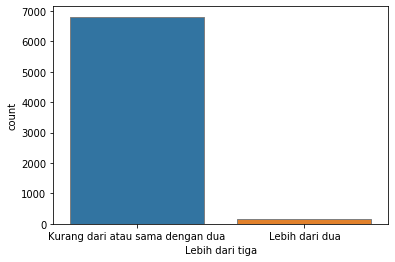

In [45]:
sns.countplot(x=data_treat['Lebih dari tiga'],edgecolor='.5')

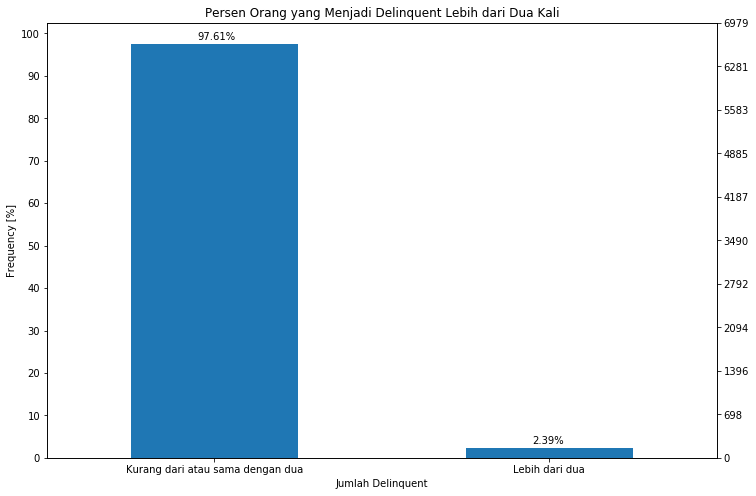

In [46]:
plt.figure(figsize=(12,8))
plt.title('Persen Orang yang Menjadi Delinquent Lebih dari Dua Kali')
plt.xlabel('Jumlah Delinquent')
plt.ylabel('Frequency [%]')

ax = (data_treat['Lebih dari tiga'].value_counts()/len(data_treat)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

In [47]:
data_treat['Lebih dari tiga'].value_counts()

Kurang dari atau sama dengan dua    6812
Lebih dari dua                       167
Name: Lebih dari tiga, dtype: int64

Hanya terdapat 167 baris atau 2.39% dari keseluruhan data yang mendapat treatment lebih dari dua kali.

## 2.3 Kesimpulan
Didapatkan dua hasil untuk kasus ini, yaitu:
 - randomcardnumber : hanya terdapat satu baris yang sesuai dengan pertanyaan
 - treatmentwave    : terdapat 167 baris yang sesuai dengan pertanyaan
Dari kedua analisis diatas maka akan digunakan hasil kedua yaitu analisis menggunakan kolom treatmentwave. Sehingga dapat dibilang ada 167 orang yang dianggap sebagai delinquent lebih dari dua kali.

# 3. How is the profile of the default customer

## Data Preprocessing & Cleansing

In [48]:
#Mengganti perlakuan apapun dengan nilai 1
df3=df.copy()
for t in treatwave:
    df3[t] = df3[t].apply(lambda x:0 if x==0 else 1)
df3[treatwave]

def jml():
    jml = 0
    for t in treatwave:
        jml+=df3[t]
        
    return jml

df3['treatment_total'] = jml()

In [49]:
default_cust = df3[df3['default'] == 1]
nondefault_cust = df3[df3['default'] == 0]

## Analisis

Text(0.5, 1.0, 'Age Distribution of Default Customer')

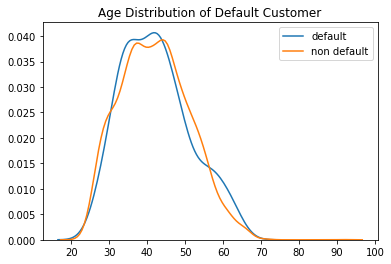

In [50]:
sns.kdeplot(default_cust['age'], label = 'default')
sns.kdeplot(nondefault_cust['age'], label = 'non default')
plt.title('Age Distribution of Default Customer')

Text(0.5, 1.0, 'Age Distribution of Default Customer')

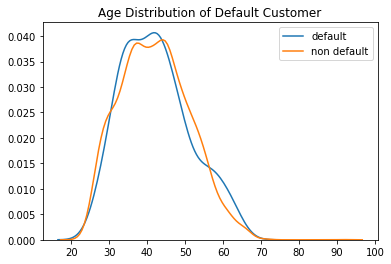

In [51]:
sns.kdeplot(default_cust['age'], label = 'default')
sns.kdeplot(nondefault_cust['age'], label = 'non default')
plt.title('Age Distribution of Default Customer')

Rata-rata umur pelanggan yang default adalah 42 tahun

<Figure size 1440x1440 with 0 Axes>

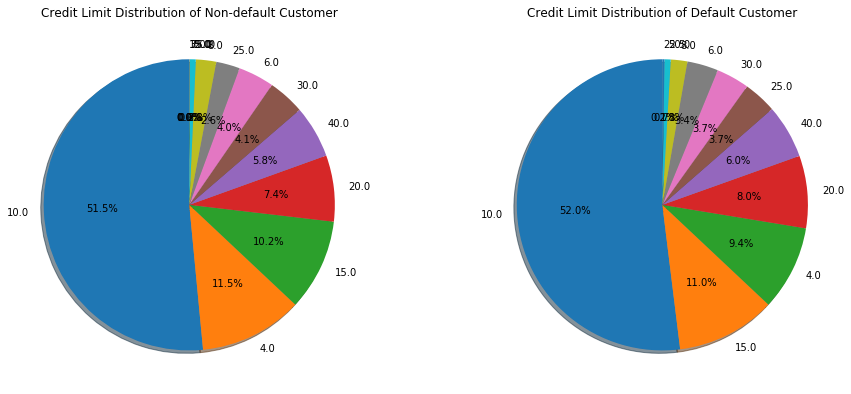

In [52]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(nondefault_cust['creditlimit'].value_counts().to_list(), labels = nondefault_cust['creditlimit'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Credit Limit Distribution of Non-default Customer')
axs[1].pie(default_cust['creditlimit'].value_counts().to_list(), labels = default_cust['creditlimit'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Credit Limit Distribution of Default Customer')

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

Default customer didominasi oleh pelanggan dengan credit limit sebesar 10 juta

<Figure size 1440x1440 with 0 Axes>

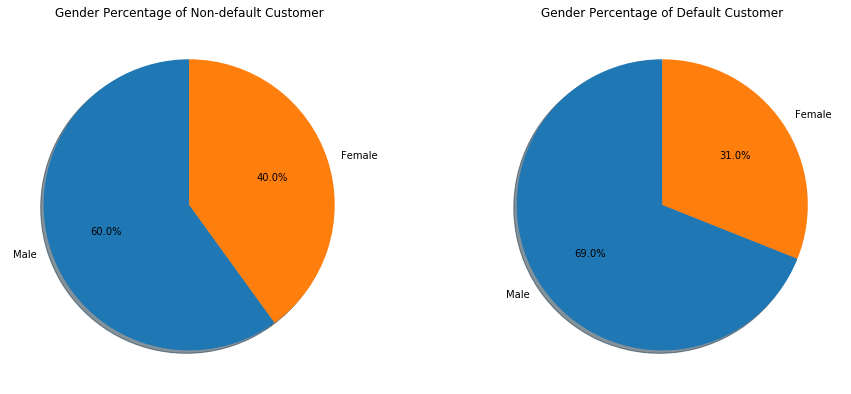

In [53]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(nondefault_cust['female'].value_counts().to_list(), labels = ['Male', 'Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Gender Percentage of Non-default Customer')
axs[1].pie(default_cust['female'].value_counts().to_list(), labels = ['Male', 'Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Gender Percentage of Default Customer')

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

Default customer didominasi oleh lelaki

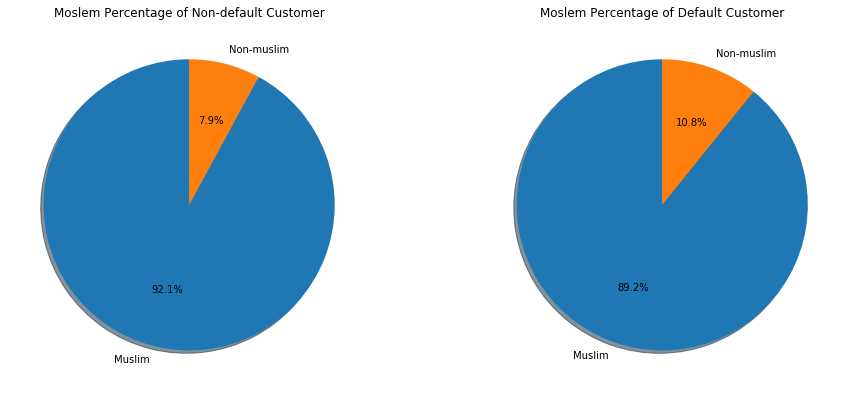

In [54]:
#plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(nondefault_cust['muslim'].value_counts().to_list(), labels = ['Muslim', 'Non-muslim'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Moslem Percentage of Non-default Customer')
axs[1].pie(default_cust['muslim'].value_counts().to_list(), labels = ['Muslim', 'Non-muslim'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Moslem Percentage of Default Customer')

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

Agama tidak berpengaruh

<Figure size 1440x1440 with 0 Axes>

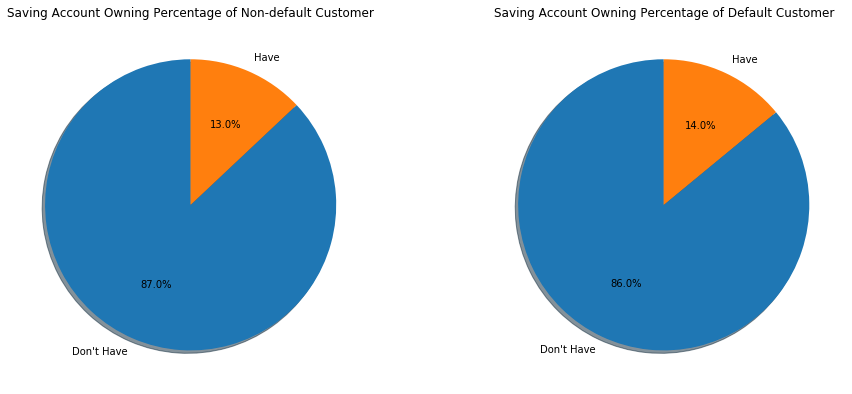

In [55]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(nondefault_cust['savings_account'].value_counts().to_list(), labels = ["Don't Have", 'Have'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Saving Account Owning Percentage of Non-default Customer')
axs[1].pie(default_cust['savings_account'].value_counts().to_list(), labels = ["Don't Have", 'Have'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Saving Account Owning Percentage of Default Customer')

fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

Pelanggan yang default mayoritas adalah lelaki

In [56]:
count_def = default_cust['treatment'].value_counts().to_list()
count_non = nondefault_cust['treatment'].value_counts().to_list()
name = default_cust['treatment'].value_counts().keys().to_list()

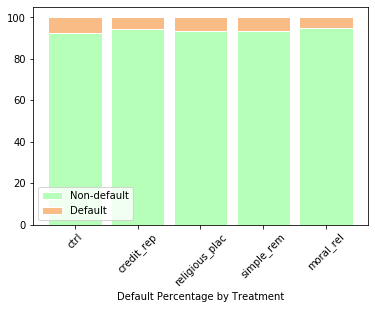

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': count_non, 'orangeBars': count_def}
plot = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(plot['greenBars'], plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(plot['orangeBars'], totals)]

 
# plot
barWidth = 0.85

# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, name, rotation = 45)
plt.xlabel("Default Percentage by Treatment")
plt.legend(['Non-default', 'Default'])

Treatment pelanggan default yang tertinggi adalah control group

Text(0.5, 1.0, 'Income Distribution of Default Customer')

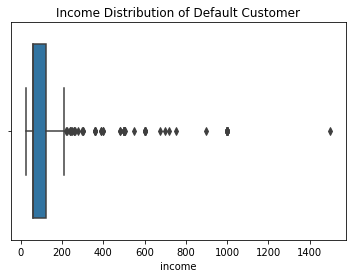

In [58]:
sns.boxplot(x = default_cust['income'])
plt.title('Income Distribution of Default Customer')

In [59]:
default_cust['income'].describe()

count     435.000000
mean      162.795322
std       232.474310
min        25.000000
25%        60.000000
50%        60.000000
75%       120.000000
max      1500.000000
Name: income, dtype: float64

50% income dari default customer di bawah 60 juta dan rata-rata incomenya adalah 162 juta

Text(0.5, 1.0, 'Outstanding Distribution of Default Customer')

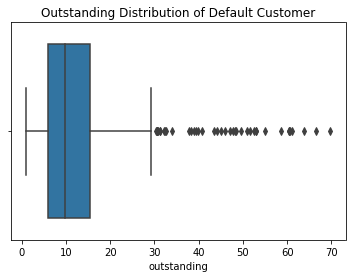

In [60]:
sns.boxplot(x = default_cust['outstanding'])
plt.title('Outstanding Distribution of Default Customer')

In [61]:
default_cust['outstanding'].describe()

count    435.000000
mean      13.569343
std       12.312907
min        0.972000
25%        6.066460
50%        9.722000
75%       15.561500
max       69.761993
Name: outstanding, dtype: float64

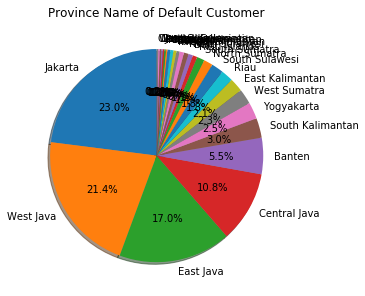

In [62]:
plt.pie(default_cust['province_name'].value_counts().to_list(), labels = default_cust['province_name'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.tight_layout()
plt.title('Province Name of Default Customer')
plt.show()

Pelanggan default didominasi oleh pelanggan yang berasal dari pulau Jawa

<Figure size 1440x1440 with 0 Axes>

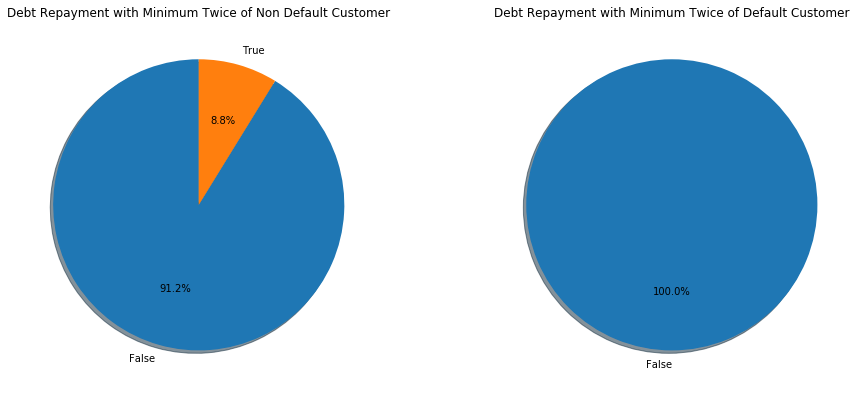

In [63]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(nondefault_cust['repaid_twice_min'].value_counts().to_list(), labels = ['False', 'True'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Debt Repayment with Minimum Twice of Non Default Customer')
axs[1].pie(default_cust['repaid_twice_min'].value_counts().to_list(), labels = ['False'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Debt Repayment with Minimum Twice of Default Customer')

fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

Pelanggan yang default tidak pernah membayar kartu kredit 2 kali atau lebih

<Figure size 1440x1440 with 0 Axes>

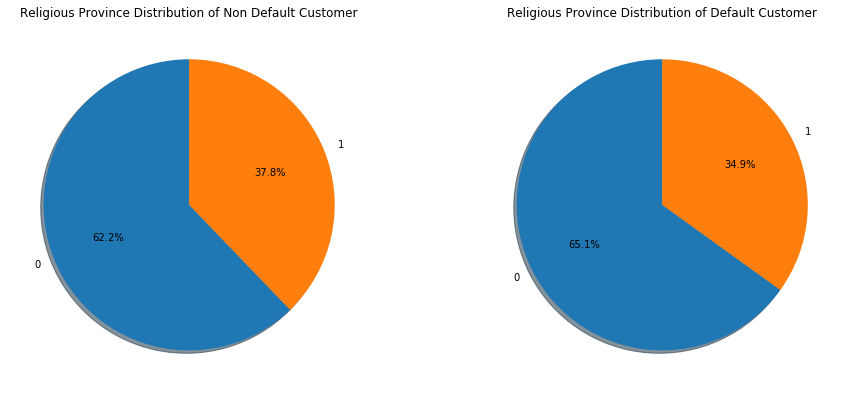

In [64]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(nondefault_cust['religious_province'].value_counts().to_list(), labels = nondefault_cust['religious_province'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Religious Province Distribution of Non Default Customer')
axs[1].pie(default_cust['religious_province'].value_counts().to_list(), labels = default_cust['religious_province'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Religious Province Distribution of Default Customer')

fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

Pelanggan yang default didominasi oleh pelanggan yang berasal dari provinsi yang non-religius

<Figure size 1440x1440 with 0 Axes>

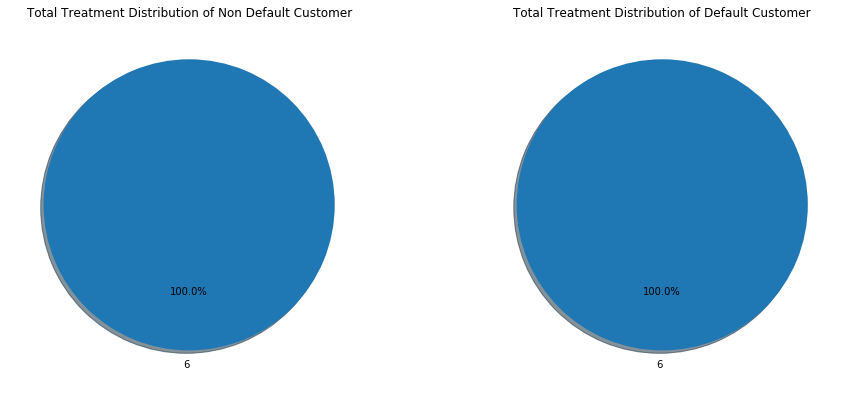

In [65]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(nondefault_cust['treatment_total'].value_counts().to_list(), labels = nondefault_cust['treatment_total'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Total Treatment Distribution of Non Default Customer')
axs[1].pie(default_cust['treatment_total'].value_counts().to_list(), labels = default_cust['treatment_total'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Total Treatment Distribution of Default Customer')

fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

# 4. How is the profile of predicted high-risk customers?

## Data Preprocessing & Cleansing

In [66]:
df['high_credit_risk'].value_counts()

0    6262
1     717
Name: high_credit_risk, dtype: int64

In [67]:
#Mengganti perlakuan apapun dengan nilai 1
df4=df.copy()
for t in treatwave:
    df4[t] = df4[t].apply(lambda x:0 if x==0 else 1)
df4[treatwave]

def jml():
    jml = 0
    for t in treatwave:
        jml+=df4[t]
        
    return jml

df4['treatment_total'] = jml()

In [81]:
highrisk = df4[df4['high_credit_risk'] == 1]
non_highrisk = df4[df4['high_credit_risk'] == 0]

## Analisis

<Figure size 1440x1440 with 0 Axes>

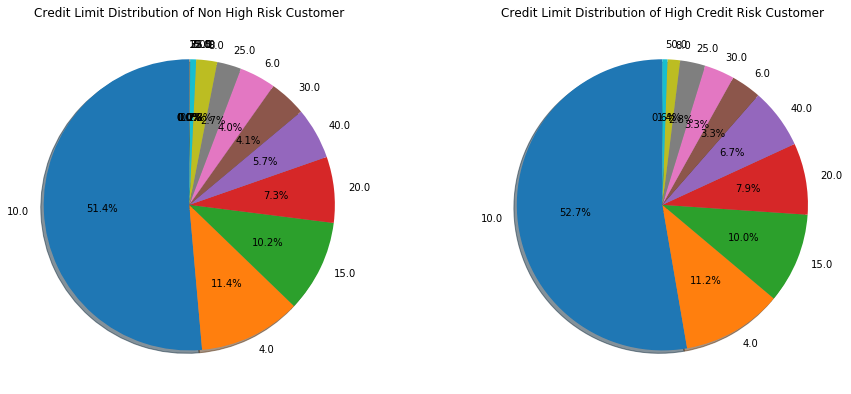

In [82]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(non_highrisk['creditlimit'].value_counts().to_list(), labels = non_highrisk['creditlimit'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Credit Limit Distribution of Non High Risk Customer')
axs[1].pie(highrisk['creditlimit'].value_counts().to_list(), labels = highrisk['creditlimit'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Credit Limit Distribution of High Credit Risk Customer')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

High risk customer didominasi oleh pelanggan dengan credit limit sebesar 10 juta

<Figure size 1440x1440 with 0 Axes>

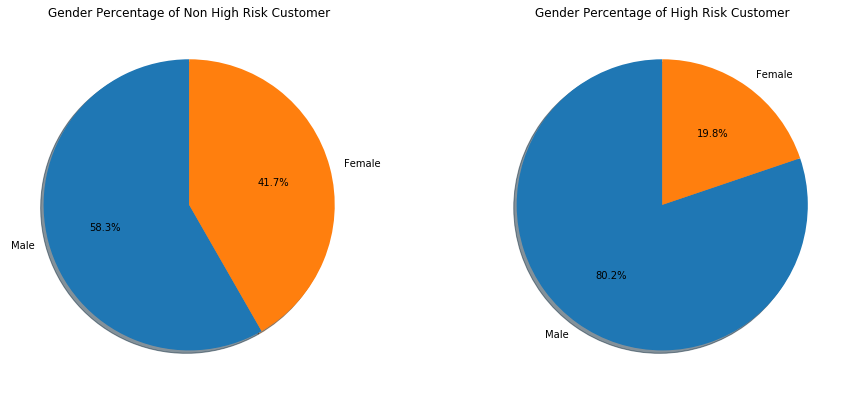

In [83]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(non_highrisk['female'].value_counts().to_list(), labels = ['Male', 'Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Gender Percentage of Non High Risk Customer')
axs[1].pie(highrisk['female'].value_counts().to_list(), labels = ['Male', 'Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Gender Percentage of High Risk Customer')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

High risk customer didominasi 80% oleh lelaki

<Figure size 1440x1440 with 0 Axes>

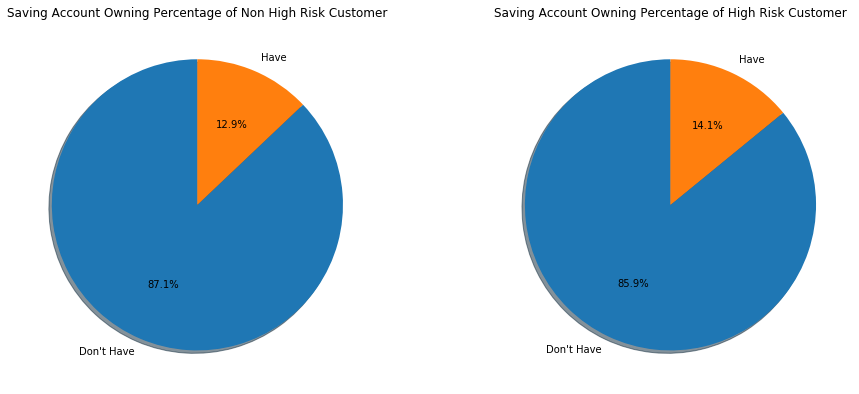

In [84]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(non_highrisk['savings_account'].value_counts().to_list(), labels = ["Don't Have", 'Have'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Saving Account Owning Percentage of Non High Risk Customer')
axs[1].pie(highrisk['savings_account'].value_counts().to_list(), labels = ["Don't Have", 'Have'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Saving Account Owning Percentage of High Risk Customer')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

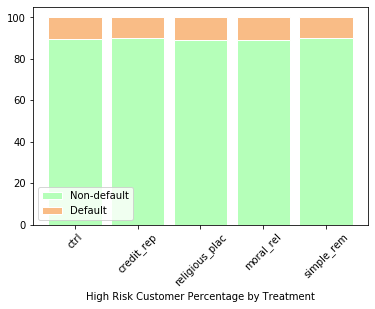

In [85]:
count_def = highrisk['treatment'].value_counts().to_list()
count_non = non_highrisk['treatment'].value_counts().to_list()
name = highrisk['treatment'].value_counts().keys().to_list()

# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': count_non, 'orangeBars': count_def}
plot = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(plot['greenBars'], plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(plot['orangeBars'], totals)]

 
# plot
barWidth = 0.85

# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, name, rotation = 45)
plt.xlabel("High Risk Customer Percentage by Treatment")
plt.legend(['Non-default', 'Default'])

Treatment pelanggan default yang tertinggi adalah religious placebo dan religious moral

Text(0.5, 1.0, 'Income Distribution of High Risk Customer')

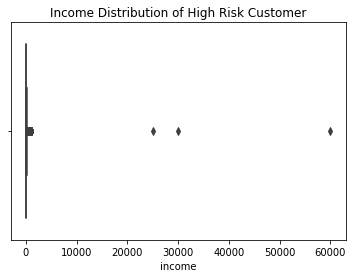

In [86]:
sns.boxplot(x = highrisk['income'])
plt.title('Income Distribution of High Risk Customer')

In [87]:
highrisk['income'].describe()

count      717.000000
mean       317.896132
std       2670.279254
min         25.000000
25%         60.000000
50%         60.000000
75%        135.000000
max      60000.000000
Name: income, dtype: float64

50% income dari default customer di bawah 60 juta dan rata-rata incomenya adalah 317 juta

Text(0.5, 1.0, 'Outstanding Distribution of High Risk Customer')

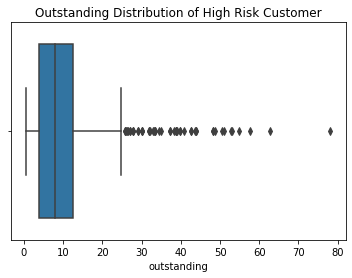

In [88]:
sns.boxplot(x = highrisk['outstanding'])
plt.title('Outstanding Distribution of High Risk Customer')

In [89]:
highrisk['outstanding'].describe()

count    717.000000
mean      10.249056
std        9.829363
min        0.500000
25%        3.780000
50%        7.967000
75%       12.508000
max       78.103600
Name: outstanding, dtype: float64

50% outstanding dari high risk customer di bawah 8 juta dan rata-rata outstandingnya adalah 10 juta

<Figure size 1440x1440 with 0 Axes>

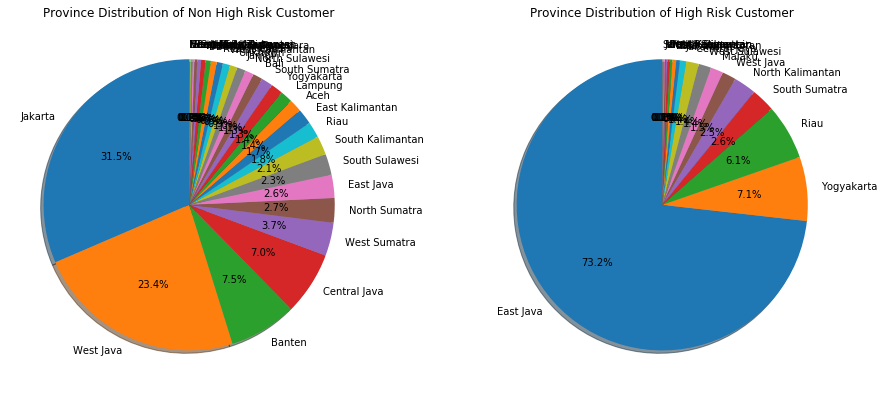

In [90]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(non_highrisk['province_name'].value_counts().to_list(), labels = non_highrisk['province_name'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Province Distribution of Non High Risk Customer')
axs[1].pie(highrisk['province_name'].value_counts().to_list(), labels = highrisk['province_name'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Province Distribution of High Risk Customer')

fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

High risk customer didominasi oleh pelanggan yang berasal dari Jawa Timur

<Figure size 1440x1440 with 0 Axes>

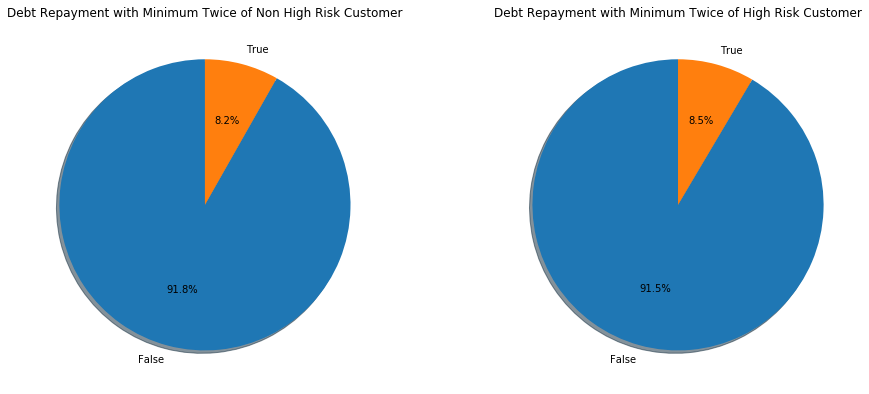

In [91]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(non_highrisk['repaid_twice_min'].value_counts().to_list(), labels = ['False', 'True'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Debt Repayment with Minimum Twice of Non High Risk Customer')
axs[1].pie(highrisk['repaid_twice_min'].value_counts().to_list(), labels = ['False', 'True'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Debt Repayment with Minimum Twice of High Risk Customer')

fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

Pelanggan dengan resiko yang tinggi mayoritas tidak membayar kartu kredit 2 kali atau lebih

<Figure size 1440x1440 with 0 Axes>

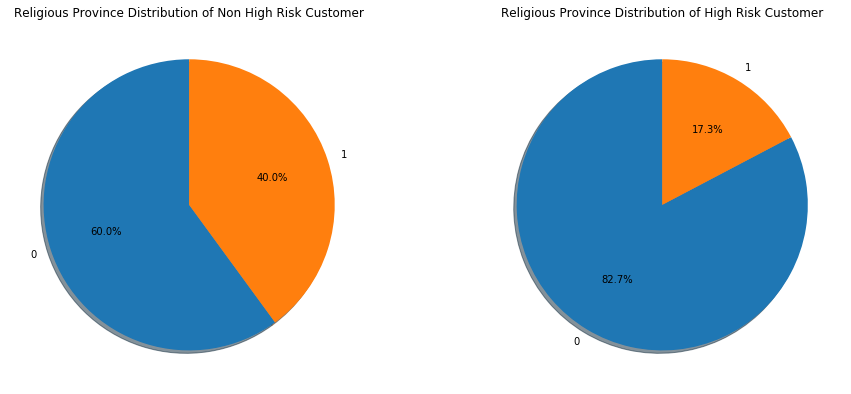

In [92]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(non_highrisk['religious_province'].value_counts().to_list(), labels = non_highrisk['religious_province'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Religious Province Distribution of Non High Risk Customer')
axs[1].pie(highrisk['religious_province'].value_counts().to_list(), labels = highrisk['religious_province'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Religious Province Distribution of High Risk Customer')

fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

Pelanggan dengan resiko yang tinggi mayoritas berasal dari provinsi yang non-religius

<Figure size 1440x1440 with 0 Axes>

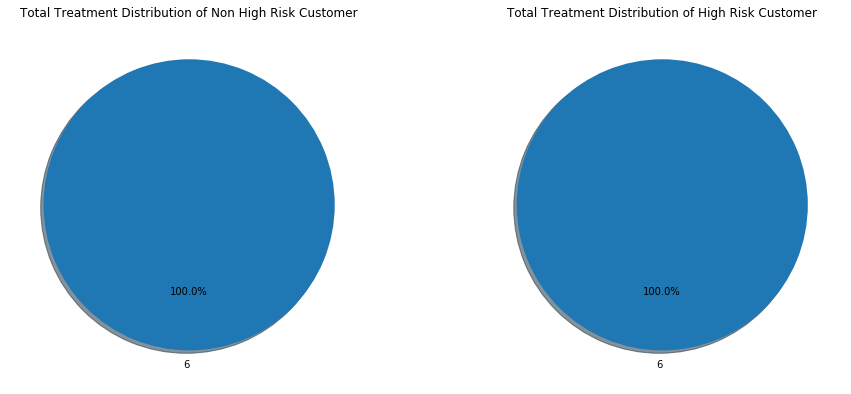

In [93]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(non_highrisk['treatment_total'].value_counts().to_list(), labels = non_highrisk['treatment_total'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Total Treatment Distribution of Non High Risk Customer')
axs[1].pie(highrisk['treatment_total'].value_counts().to_list(), labels = highrisk['treatment_total'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Total Treatment Distribution of High Risk Customer')

fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

Pelanggan dengan resiko yang tinggi mendapat treatment 1-3 kali dan mayoritas mendapat 1 kali treatment

# 5 Do you think, the default customers are the ones who are financially not able to pay their                 debt? Please explain your answer!  

## 5.1 Income
Pertama kita lihat kemampuan pelanggan default dengan non default secara pendapatannya.

### Data Preprocessing & Cleansing  

In [94]:
df.shape

(6979, 72)

In [95]:
df['income'].describe()

count     6979.000000
mean       153.343886
std        881.867224
min          0.000000
25%         60.000000
50%         60.000000
75%        116.957500
max      60000.000000
Name: income, dtype: float64

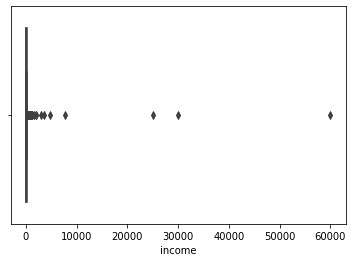

In [96]:
sns.boxplot(x=df['income'])

Asumsikan orang dengan income > 1 miliar tidak memerlukan kartu kredit lagi dan orang dengan income < 1 juta tidak boleh mendapat kartu kredit.

In [97]:
# Menghapus baris dengan income < 1 juta atau >1 miliar
df1 = df.copy()
drop = df1[(df1['income']<1) | (df1['income']>1000)]
df1.drop(drop.index,inplace=True)
df1.shape

(6963, 72)

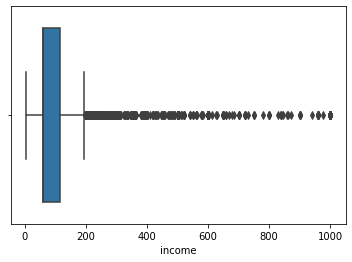

In [98]:
sns.boxplot(x=df1['income'])

In [99]:
df1['income'].describe()

count    6963.000000
mean      133.103961
std       178.508561
min         3.878700
25%        60.000000
50%        60.000000
75%       114.321750
max      1000.000000
Name: income, dtype: float64

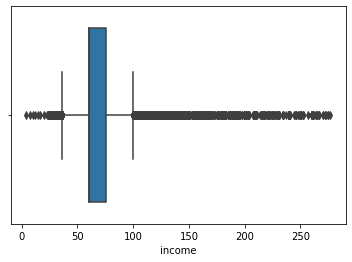

In [100]:
q1 = df1['income'].quantile(0.25)
q3 = df1['income'].quantile(0.75)
iqr = q3-q1
batas_atas = 3*iqr + q3
batas_bawah = q1 - 3*iqr
outliers = df1[(df1['income'] > batas_atas) | (df1['income'] < batas_bawah)]
df1.drop(outliers.index,inplace=True)
sns.boxplot(x=df1['income'])

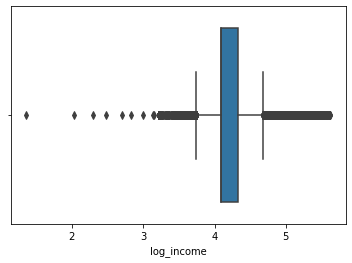

In [101]:
df1['log_income'] = df1['income'].apply(lambda x: np.log(x))
sns.boxplot(x=df1['log_income'])

In [102]:
# Mengkategorikan sesuai default atau tidak
default = df1[df1['default']==1]
non_default = df1[df1['default']==0]

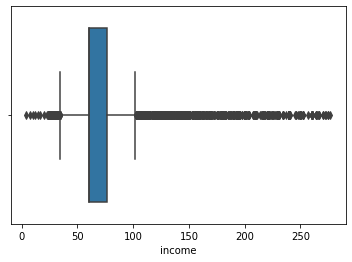

In [103]:
sns.boxplot(x=non_default['income'])

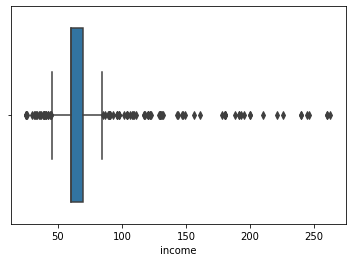

In [104]:
sns.boxplot(x=default['income'])

### Analisis

Text(0.5, 1.0, 'Distribusi Pemasukkan Default')

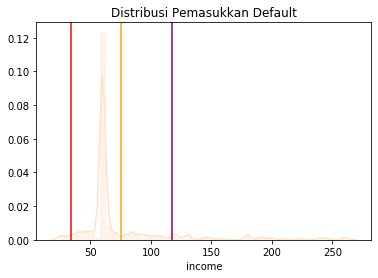

In [105]:
sns.set_palette('Oranges')
rata=default['income'].mean()
std=default['income'].std()
atas=rata+std
bawah=rata-std
sns.distplot(a=default['income'])
plt.axvline(atas,color='purple')
plt.axvline(rata,color='orange')
plt.axvline(bawah,color='red')
plt.title('Distribusi Pemasukkan Default')

Text(0.5, 1.0, 'Distribusi Pemasukkan Non Default')

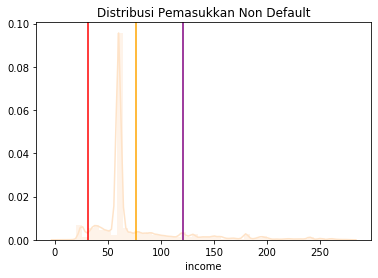

In [106]:
rata_non=non_default['income'].mean()
std_non=non_default['income'].std()
atas_non=rata_non+std_non
bawah_non=rata_non-std_non
sns.distplot(a=non_default['income'])
plt.axvline(atas_non,color='purple')
plt.axvline(rata_non,color='orange')
plt.axvline(bawah_non,color='red')
plt.title('Distribusi Pemasukkan Non Default')

In [107]:
def mampu(x):
    if x>atas:
        return 'menengah keatas'
    elif x<bawah:
        return 'menengah kebawah'
    else:
        return 'menengah'
default['finansial'] = default['income'].apply(mampu) 
default['finansial'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


menengah            313
menengah keatas      45
menengah kebawah     10
Name: finansial, dtype: int64

In [108]:
def mampu_non(x):
    if x>atas_non:
        return 'menengah keatas'
    elif x<bawah_non:
        return 'menengah kebawah'
    else:
        return 'menengah'
non_default['finansial'] = non_default['income'].apply(mampu) 
non_default['finansial'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


menengah            4601
menengah keatas      865
menengah kebawah     323
Name: finansial, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

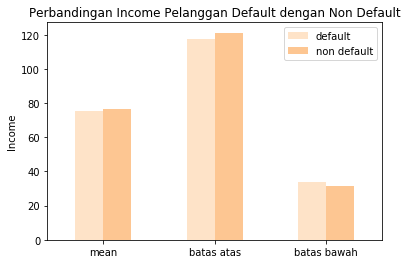

In [109]:
plotdata = pd.DataFrame({'default':[rata,atas,bawah],'non default':[rata_non,atas_non,bawah_non]},index=['mean','batas atas','batas bawah'])
plotdata.plot(kind='bar')
plt.title('Perbandingan Income Pelanggan Default dengan Non Default')

plt.ylabel('Income')
plt.xticks(rotation=0)

<Figure size 1440x1440 with 0 Axes>

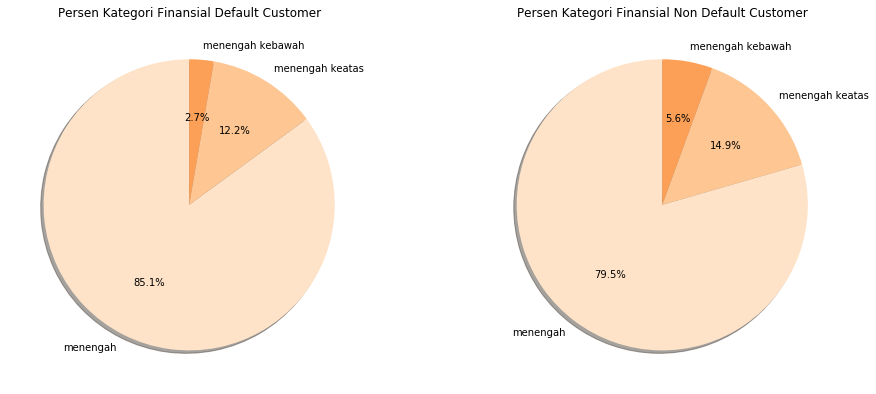

In [110]:
plt.figure(figsize = (20,20))

fig, axs = plt.subplots(1, 2)
axs[0].pie(default['finansial'].value_counts().to_list(), labels = default['finansial'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Persen Kategori Finansial Default Customer')
axs[1].pie(non_default['finansial'].value_counts().to_list(), labels = non_default['finansial'].value_counts().keys().to_list(), autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title('Persen Kategori Finansial Non Default Customer')

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.set_size_inches(15, 10.5)
fig.subplots_adjust(wspace=.3)

Dapat dilihat bahwa secara pendapatan orang yang termasuk dalam kategori default sebenarnya lebih banyak yang mampu dibanding yang tidak mampu sehingga seharusnya secara finansial mereka dapat membayar tagihan kartu kredit mereka dari segi pendapatannya. Kemudian distribusi pendapatan antara pelanggan yang default maupun tidak default juga hampir mirip sehingga dapat dikatakan pelanggan yang termasuk default sebenarnya dapat membayar tagihan mereka secara finansial

## 5.2 Debt Ratio
Selanjutnya kita akan melihat apakah pelanggan yang masuk kategori default dapat membayar hutangnya atau tidak. Kita menggunakan kolom outstanding dengan income untuk analisis kali ini untuk melihat bagaimana perbandingan sisa hutang pelanggan terhadap gaji mereka. Pelanggan yang baik seharusnya memiliki outstanding yang kecil dibanding dengan incomenya agar dapat membayar tagihannya setiap bulan. Jika rasio outstandingnya besar(lebih dari satu) maka pelanggan pasti tidak bisa membayar hutangnya karena pengeluarannya lebih besar dari pemasukannya. Oleh karena itu kita akan melihat apakah pelanggan default memang jarang membayar hutangnya sehingga outstanding mereka lebih besar dari income mereka.

### Data Preprocessing & Cleansing
Melihat kolom outstanding apakah terdapat outlier dan memutuskan tindakan untuk outlier tersebut. Kemudian membuat kolom baru debt_ratio untuk perbandingan antara tagihan dengan pendapata.

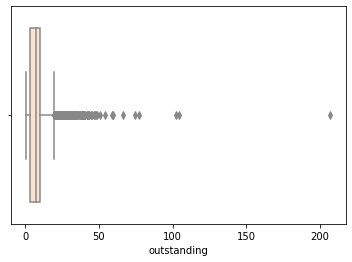

In [111]:
sns.boxplot(x=df1['outstanding'])

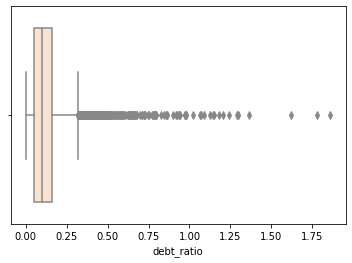

In [112]:
df1['debt_ratio'] = df1['outstanding']/df1['income']
sns.boxplot(x=df1['debt_ratio'])

In [113]:
df1['debt_ratio'].describe()

count    6157.000000
mean        0.130156
std         0.128324
min         0.001818
25%         0.053617
50%         0.101490
75%         0.159060
max         1.859248
Name: debt_ratio, dtype: float64

In [114]:
df1['tidak_dapat_bayar'] = df1['debt_ratio'].apply(lambda x:'ya' if x>0.8 else 'tidak')

In [115]:
# Mengkategorikan sesuai default atau tidak
default = df1[df1['default']==1]
non_default = df1[df1['default']==0]

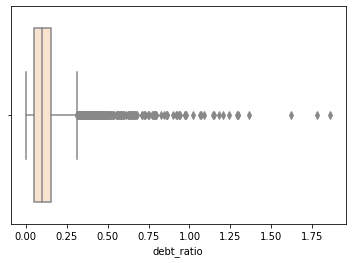

In [116]:
sns.boxplot(x=non_default['debt_ratio'])

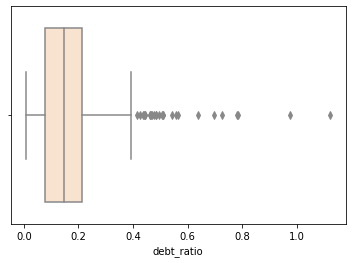

In [117]:
sns.boxplot(x=default['debt_ratio'])

Text(0.5, 1.0, 'Ratio Outstanding Against Income')

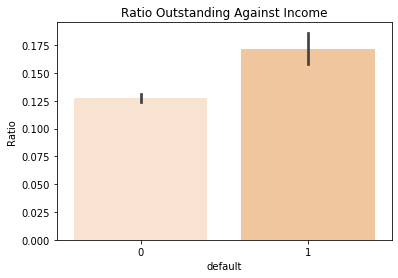

In [118]:
sns.barplot(x=df1['default'],y=df1['debt_ratio'])
plt.ylabel('Ratio')
plt.title('Ratio Outstanding Against Income')

Text(0.5, 1.0, 'Boros Default')

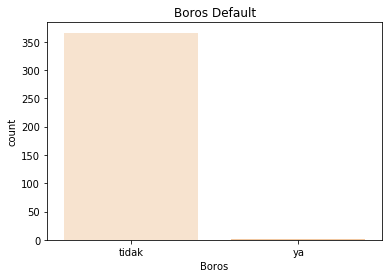

In [119]:
sns.countplot(x=default['tidak_dapat_bayar'])
plt.xlabel('Boros')
plt.title('Boros Default')

Text(0.5, 1.0, 'Boros Non Default')

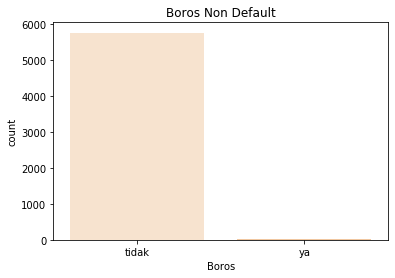

In [120]:
sns.countplot(x=non_default['tidak_dapat_bayar'])
plt.xlabel('Boros')
plt.title('Boros Non Default')

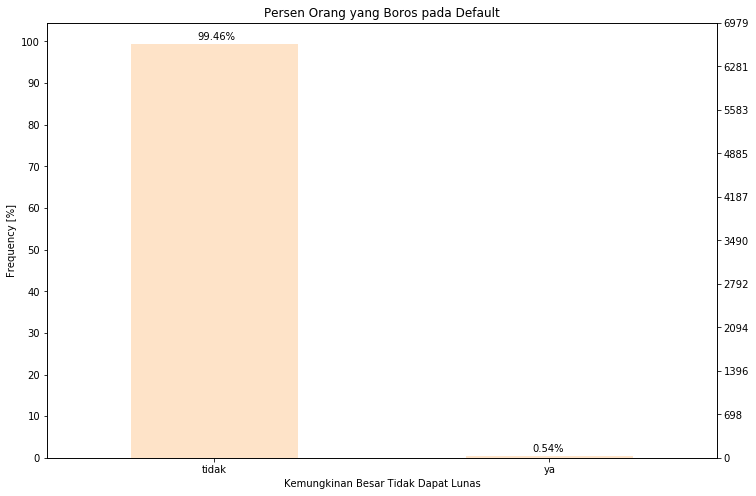

In [121]:
plt.figure(figsize=(12,8))
plt.title('Persen Orang yang Boros pada Default')
plt.xlabel('Kemungkinan Besar Tidak Dapat Lunas')
plt.ylabel('Frequency [%]')

ax = (default['tidak_dapat_bayar'].value_counts()/len(default)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

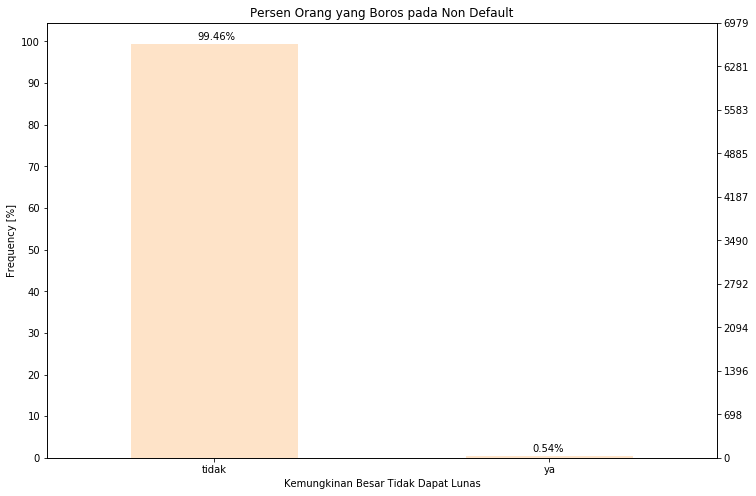

In [122]:
plt.figure(figsize=(12,8))
plt.title('Persen Orang yang Boros pada Non Default')
plt.xlabel('Kemungkinan Besar Tidak Dapat Lunas')
plt.ylabel('Frequency [%]')

ax = (non_default['tidak_dapat_bayar'].value_counts()/len(non_default)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

## Kesimpulan
Dilihat dari kedua analisis bahwa sebenarnya pelanggan yang termasuk kategori default maupun tidak memiliki data yang hampir mirip. Sehingga kita dapat bilang bahwa pelanggan masuk kategori default bukan karena tidak mampu membayar secara finansial merupakan pilihan mereka sendiri tidak membayar tagihannya.